# Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import re
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
# === Load preselected SNP data === #
data_snp = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/ADSP/SNP_coding_chr1_chr22_dominant.csv")  # Replace with your full merged dataset if needed
print(data_snp.shape)
data_snp.head()


(48245, 1704)


,chr1_4585378_C_A_A,chr1_4585868_C_T_T,chr1_4588720_C_T_T,chr1_4588765_C_T_T,chr1_4590581_A_T_T,chr1_4591144_G_A_A,chr1_4591945_G_C_C,chr1_4596801_G_A_A,chr1_5032100_T_C_C,chr1_5033150_G_T_T,...,chr19_49955674_C_A_A,chr20_13600858_T_C_C,chr20_14846286_C_T_T,chr20_51850271_C_T_T,chr20_59682940_G_T_T,chr20_59683632_A_G_G,chr21_24637474_G_A_A,chr21_26382583_C_T_T,chr21_39878130_G_A_A,chr22_25314269_A_G_G
0,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [3]:
#df_filtered = data_snp.loc[:, ~data_snp.columns.str.startswith("chr19")]
#data_snp = df_filtered.copy()

In [4]:
# === Load preselected SNP data === #
data_pheno = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/ADSP/ADSPCaseControlPhenotypes_DS_2024.11.22_ALL_FiltByFAM.txt",sep="\t")  # Replace with your full merged dataset if needed
print(data_pheno.shape)
data_pheno.head()

(48245, 30)


,SUBJID,Cohort,Sex,PrevAD,IncAD,Age,Age_baseline,APOE_reported,APOE_WGS,AUTOPSY,...,Base_IncAD,Base_Age,Base_AUTOPSY,Base_Braak,Base_AD,Base_Version,Update_Baseline,Update_Latest,Update_ADstatus,Correction
0,A-ACT-AC000014,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,77.0,73.0,23.0,23.0,NaN,...,0.0,77.0,NaN,0.0,0.0,phs000572.v3,0,0,0,0
1,A-ACT-AC000034,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,68.0,66.0,33.0,33.0,NaN,...,0.0,68.0,NaN,1.0,0.0,phs000572.v3,0,0,0,0
2,A-ACT-AC000057,Adult_Changes_in_Thought_(ACT),0,0.0,1.0,88.0,81.0,33.0,33.0,NaN,...,1.0,88.0,NaN,4.0,1.0,phs000572.v3,0,0,0,0
3,A-ACT-AC000072,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,90.0,89.0,33.0,33.0,NaN,...,1.0,89.0,NaN,6.0,1.0,phs000572.v3,1,0,0,1
4,A-ACT-AC000088,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,86.0,73.0,33.0,33.0,NaN,...,1.0,86.0,NaN,5.0,1.0,phs000572.v3,0,0,0,0


In [5]:
data = pd.concat([data_pheno, data_snp], axis=1)
data

,SUBJID,Cohort,Sex,PrevAD,IncAD,Age,Age_baseline,APOE_reported,APOE_WGS,AUTOPSY,...,chr19_49955674_C_A_A,chr20_13600858_T_C_C,chr20_14846286_C_T_T,chr20_51850271_C_T_T,chr20_59682940_G_T_T,chr20_59683632_A_G_G,chr21_24637474_G_A_A,chr21_26382583_C_T_T,chr21_39878130_G_A_A,chr22_25314269_A_G_G
0,A-ACT-AC000014,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,77.0,73.0,23.0,23.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,A-ACT-AC000034,Adult_Changes_in_Thought_(ACT),0,0.0,0.0,68.0,66.0,33.0,33.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,A-ACT-AC000057,Adult_Changes_in_Thought_(ACT),0,0.0,1.0,88.0,81.0,33.0,33.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,A-ACT-AC000072,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,90.0,89.0,33.0,33.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A-ACT-AC000088,Adult_Changes_in_Thought_(ACT),1,0.0,1.0,86.0,73.0,33.0,33.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48240,A-ADC-AD019351,NIA_Alzheimer_Disease_Centers_(ADC),1,0.0,0.0,77.0,64.0,44.0,44.0,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48241,A-ADC-AD019352,NIA_Alzheimer_Disease_Centers_(ADC),0,NaN,NaN,NaN,78.0,34.0,34.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
48242,A-ADC-AD019353,NIA_Alzheimer_Disease_Centers_(ADC),1,0.0,0.0,82.0,82.0,34.0,34.0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
48243,A-ADC-AD019354,NIA_Alzheimer_Disease_Centers_(ADC),0,NaN,NaN,NaN,70.0,33.0,33.0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [6]:
print(data.shape)

(48245, 1734)


In [7]:
data.columns.to_list()[0:30]

['SUBJID',
 'Cohort',
 'Sex',
 'PrevAD',
 'IncAD',
 'Age',
 'Age_baseline',
 'APOE_reported',
 'APOE_WGS',
 'AUTOPSY',
 'Braak',
 'Race',
 'Ethnicity',
 'Selection',
 'AD',
 'Comments',
 'Duplicate_SUBJID',
 'Flag',
 'Latest_Update_Version',
 'Base_PrevAD',
 'Base_IncAD',
 'Base_Age',
 'Base_AUTOPSY',
 'Base_Braak',
 'Base_AD',
 'Base_Version',
 'Update_Baseline',
 'Update_Latest',
 'Update_ADstatus',
 'Correction']

In [8]:
data['Ethnicity'].value_counts()

Ethnicity
0.0    32885
1.0    13279
Name: count, dtype: int64

In [9]:
data = data[data['Ethnicity'] == 0]
print(data.shape)

(32885, 1734)


In [10]:
# === Define features and target === #
data.rename(columns={'AD': 'ADRD'}, inplace=True)
data.rename(columns={'APOE_reported': 'APOE4'}, inplace=True)
df_filtered = data[data['ADRD'].notna()]
data = df_filtered.copy()
print(data.shape)


X = data.drop(columns=['SUBJID',
 'Cohort',
 'Sex',
 'PrevAD',
 'IncAD',
 'Age',
 'Age_baseline',
 'APOE4',
 'APOE_WGS',
 'AUTOPSY',
 'Braak',
 'Race',
 'Ethnicity',
 'Selection',
 'ADRD',
 'Comments',
 'Duplicate_SUBJID',
 'Flag',
 'Latest_Update_Version',
 'Base_PrevAD',
 'Base_IncAD',
 'Base_Age',
 'Base_AUTOPSY',
 'Base_Braak',
 'Base_AD',
 'Base_Version',
 'Update_Baseline',
 'Update_Latest',
 'Update_ADstatus',
 'Correction'])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]


(26879, 1734)


In [11]:
X.head(20)

,chr1_4585378_C_A_A,chr1_4585868_C_T_T,chr1_4588720_C_T_T,chr1_4588765_C_T_T,chr1_4590581_A_T_T,chr1_4591144_G_A_A,chr1_4591945_G_C_C,chr1_4596801_G_A_A,chr1_5032100_T_C_C,chr1_5033150_G_T_T,...,chr19_49955674_C_A_A,chr20_13600858_T_C_C,chr20_14846286_C_T_T,chr20_51850271_C_T_T,chr20_59682940_G_T_T,chr20_59683632_A_G_G,chr21_24637474_G_A_A,chr21_26382583_C_T_T,chr21_39878130_G_A_A,chr22_25314269_A_G_G
0,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,1,1,1,1,1,1,1,1.0,0,0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,0,0,0,0,0,0,0,0.0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1,1,1,1,1,1,1,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: ADRD, dtype: float64

In [13]:
print(y.value_counts())


ADRD
0.0    19030
1.0     7849
Name: count, dtype: int64


In [14]:
y

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
48233    0.0
48237    0.0
48239    0.0
48240    0.0
48242    0.0
Name: ADRD, Length: 26879, dtype: float64

# Split data

In [15]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())

# Option 1: Drop rows with any NaNs in X or y
#data_clean = data.dropna()
#X = data_clean.drop(columns=["IID", "ADRD"])
#y = data_clean["ADRD"]
#data = data_clean.copy()


# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 25375
NaNs in y: 0
Infinite values in X: 0
After cleaning - NaNs in X: 25375
After cleaning - NaNs in y: 0


In [16]:
columns_no_nan = X.columns[X.notna().all()]

In [17]:
len(columns_no_nan)

1487

In [18]:
len(X.columns.to_list())

1704

In [19]:
print(X.shape)
X_temp = X[columns_no_nan]
X = X_temp.copy()
print(X.shape)

(26879, 1704)
(26879, 1487)


In [20]:
#data_clean = data.dropna()
#data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [22]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


In [23]:
X_train

,chr1_4585378_C_A_A,chr1_4585868_C_T_T,chr1_4588720_C_T_T,chr1_4588765_C_T_T,chr1_4590581_A_T_T,chr1_4591144_G_A_A,chr1_4591945_G_C_C,chr1_5032100_T_C_C,chr1_5033150_G_T_T,chr1_5033592_C_T_T,...,chr19_49952094_C_T_T,chr19_49955674_C_A_A,chr20_13600858_T_C_C,chr20_14846286_C_T_T,chr20_51850271_C_T_T,chr20_59682940_G_T_T,chr21_24637474_G_A_A,chr21_26382583_C_T_T,chr21_39878130_G_A_A,chr22_25314269_A_G_G
43008,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34436,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25143,1,0,1,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18446,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24113,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29132,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23468,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16114,0,0,0,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13684,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression Models

In [ ]:
# === Define models and hyperparameter grids === #
param_distributions = {
    "Logistic_Lasso": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"C": np.logspace(-4, 2, 10), "penalty": ["l1"]}
    },
    "Logistic_Ridge": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"C": np.logspace(-4, 2, 10), "penalty": ["l2"]}
    },
    "Logistic_ElasticNet": {
        "model": LogisticRegression(solver='saga', max_iter=1000, l1_ratio=0.5),
        "params": {"C": np.logspace(-4, 2, 10), "penalty": ["elasticnet"], "l1_ratio": [0.1, 0.5, 0.9]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 6, 9]}
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "num_leaves": [20, 31, 40]}
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {"depth": [4, 6, 8], "learning_rate": [0.01, 0.1, 0.2], "iterations": [100, 200, 300]}
    },
    "NeuralNetwork": {
        "model": MLPClassifier(max_iter=500),
        "params": {"hidden_layer_sizes": [(50,), (100,), (100, 50)], "alpha": np.logspace(-4, 1, 5)}
    }
}



🔎 Performing randomized search for Logistic_ElasticNet...
✅ Best hyperparameters for Logistic_ElasticNet: {'penalty': 'elasticnet', 'l1_ratio': 0.1, 'C': 0.01}


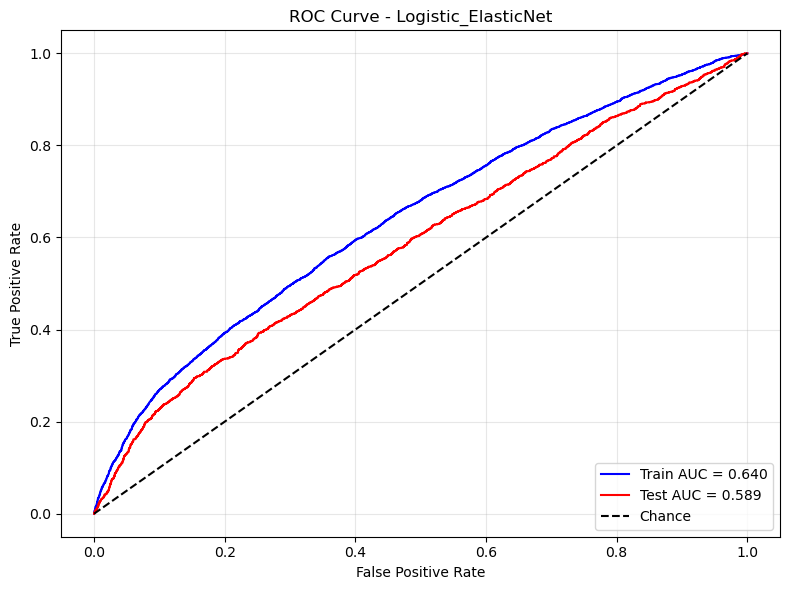

📊 Logistic_ElasticNet - Train AUC: 0.6398 | Test AUC: 0.5887

🔎 Performing randomized search for XGBoost...
✅ Best hyperparameters for XGBoost: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


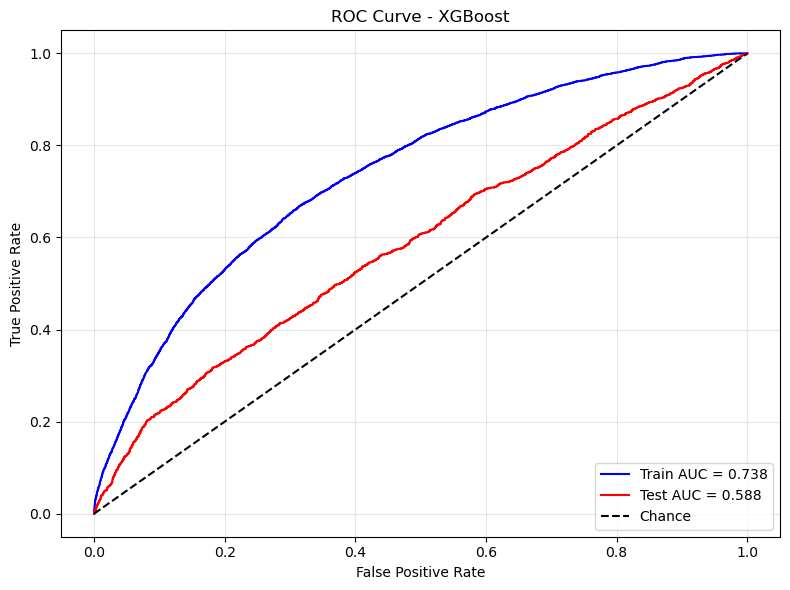

📊 XGBoost - Train AUC: 0.7382 | Test AUC: 0.5876

🔎 Performing randomized search for LightGBM...
[LightGBM] [Info] Number of positive: 5887, number of negative: 14272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2974
[LightGBM] [Info] Number of data points in the train set: 20159, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.292028 -> initscore=-0.885553
[LightGBM] [Info] Start training from score -0.885553
✅ Best hyperparameters for LightGBM: {'num_leaves': 40, 'n_estimators': 200, 'learning_rate': 0.01}


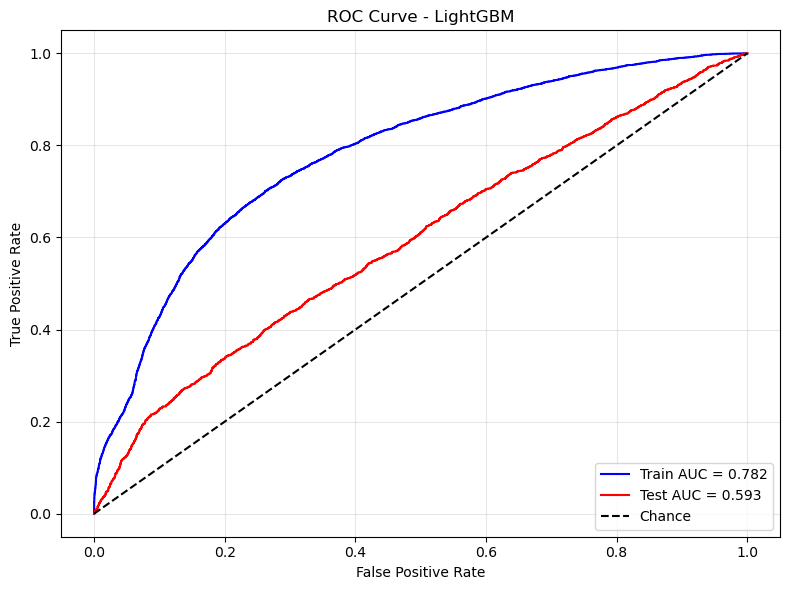

📊 LightGBM - Train AUC: 0.7821 | Test AUC: 0.5926

🔎 Performing randomized search for CatBoost...
✅ Best hyperparameters for CatBoost: {'learning_rate': 0.01, 'iterations': 300, 'depth': 8}


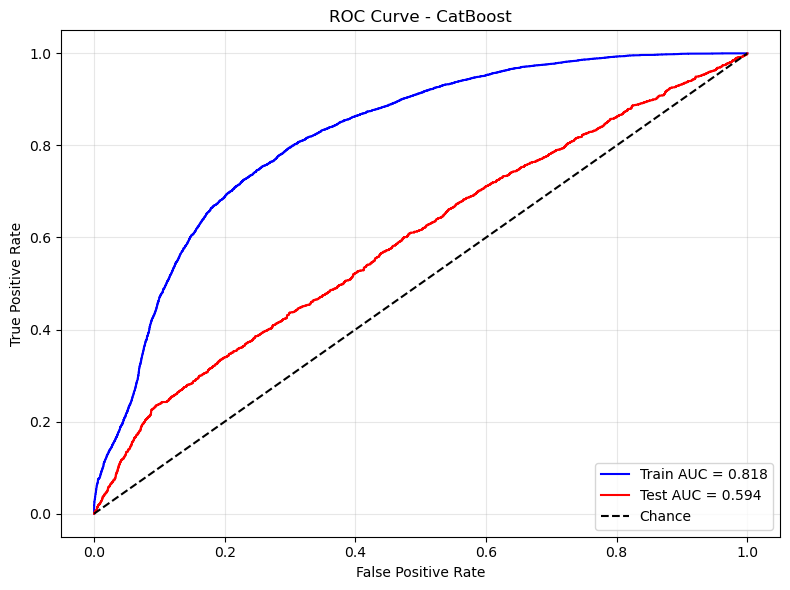

📊 CatBoost - Train AUC: 0.8185 | Test AUC: 0.5945

🔎 Performing randomized search for NeuralNetwork...
✅ Best hyperparameters for NeuralNetwork: {'hidden_layer_sizes': (100,), 'alpha': 10.0}


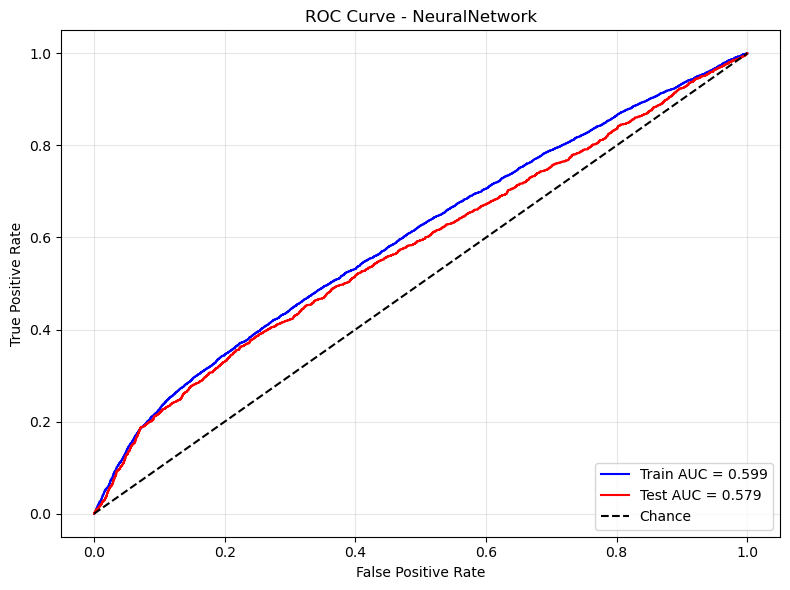

📊 NeuralNetwork - Train AUC: 0.5992 | Test AUC: 0.5785


In [25]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# === Train, evaluate, and plot ROC curves === #
for name, config in param_distributions.items():
    print(f"\n🔎 Performing randomized search for {name}...")

    # Randomized hyperparameter search
    random_search = RandomizedSearchCV(
        config["model"], config["params"], cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=4
    )
    
    random_search.fit(X_train, y_train)  # Cross-validation on training set
    best_model = random_search.best_estimator_  # Select best model from CV
    
    print(f"✅ Best hyperparameters for {name}: {random_search.best_params_}")

    # Predict probabilities using the best model
    y_train_pred = best_model.predict_proba(X_train)[:, 1]
    y_test_pred = best_model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"../output/plots/ROC_{name}_CHsumStat_PRADIdosage_dominant_ADSP.png")
    plt.show()

    print(f"📊 {name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

# Fitting

In [26]:
print(y_train.value_counts())


ADRD
0.0    14272
1.0     5887
Name: count, dtype: int64


# Evaluation of feature importance

In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


🔎 Evaluating Logistic_ElasticNet with best hyperparameters...


✅ Mean ROC-AUC (CV): 0.5927 ± 0.0088
📊 Logistic_ElasticNet - Train AUC: 0.6398 | Test AUC: 0.5887


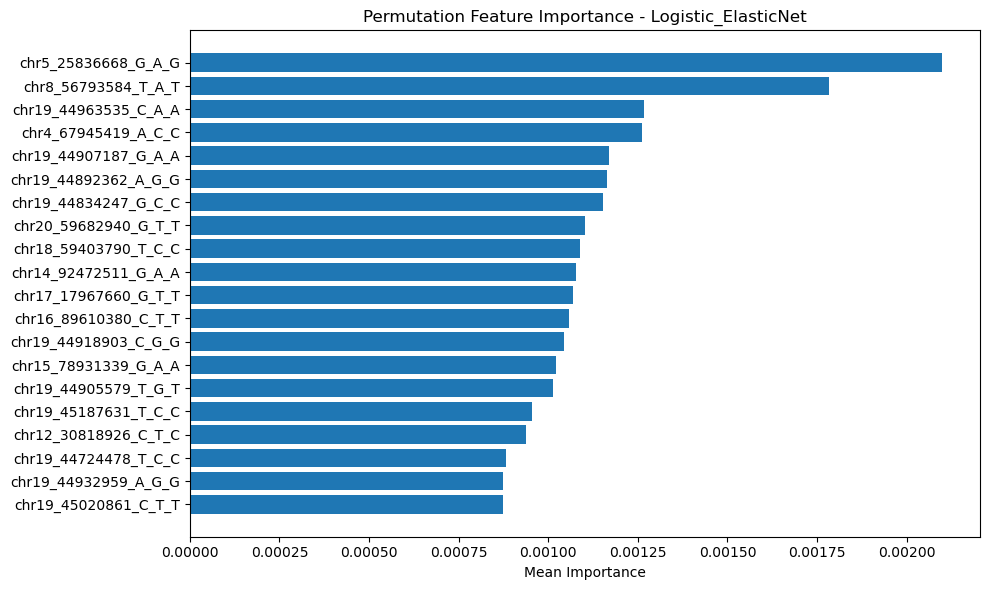


🔎 Evaluating XGBoost with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.5924 ± 0.0094
📊 XGBoost - Train AUC: 0.7382 | Test AUC: 0.5876


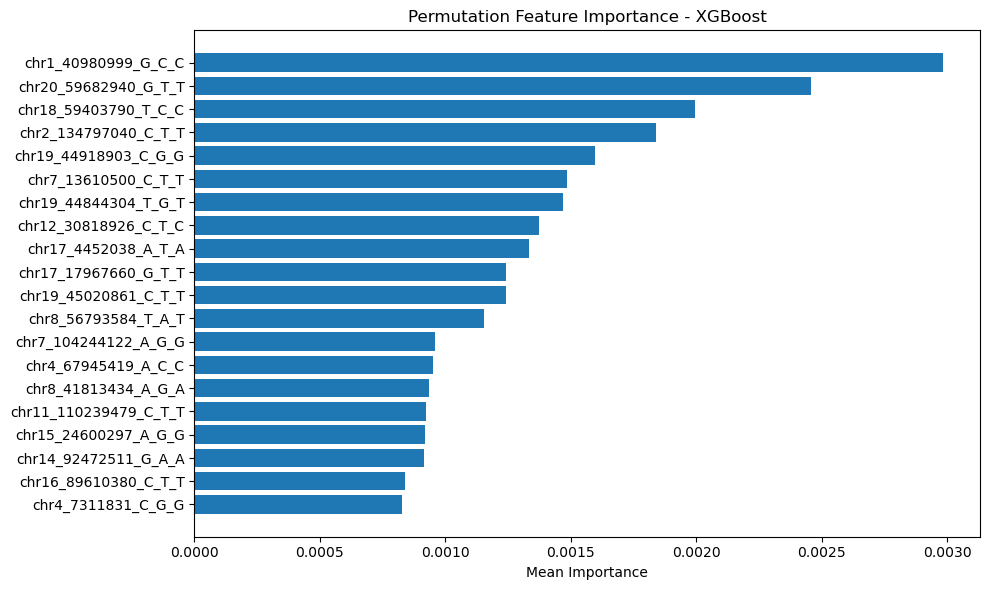


🔎 Evaluating LightGBM with best hyperparameters...
[LightGBM] [Info] Number of positive: 5887, number of negative: 14272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2974
[LightGBM] [Info] Number of data points in the train set: 20159, number of used features: 1487
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.292028 -> initscore=-0.885553
[LightGBM] [Info] Start training from score -0.885553
✅ Mean ROC-AUC (CV): 0.5912 ± 0.0065
📊 LightGBM - Train AUC: 0.7821 | Test AUC: 0.5926


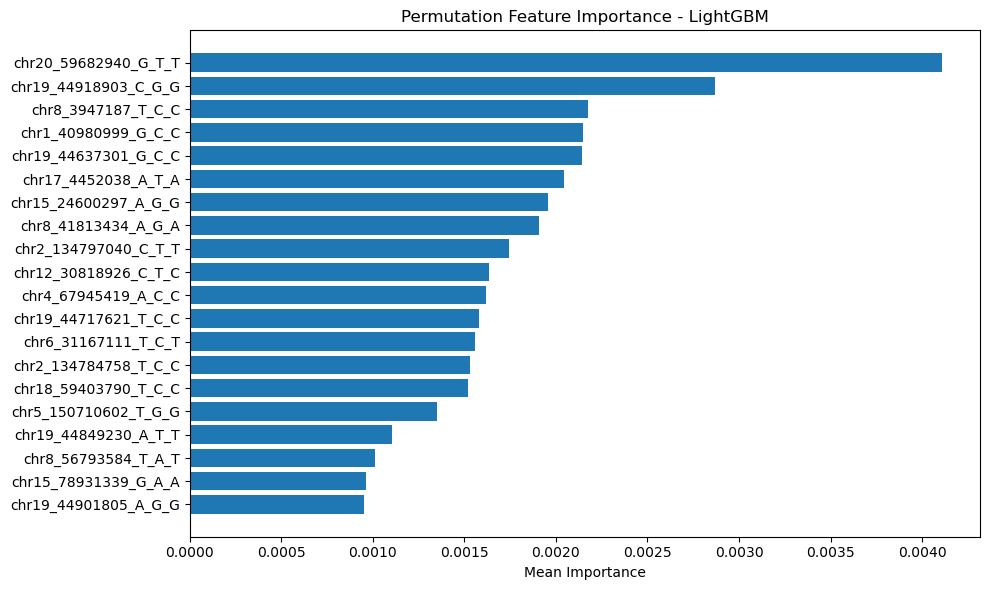


🔎 Evaluating CatBoost with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.5912 ± 0.0017
📊 CatBoost - Train AUC: 0.8185 | Test AUC: 0.5945


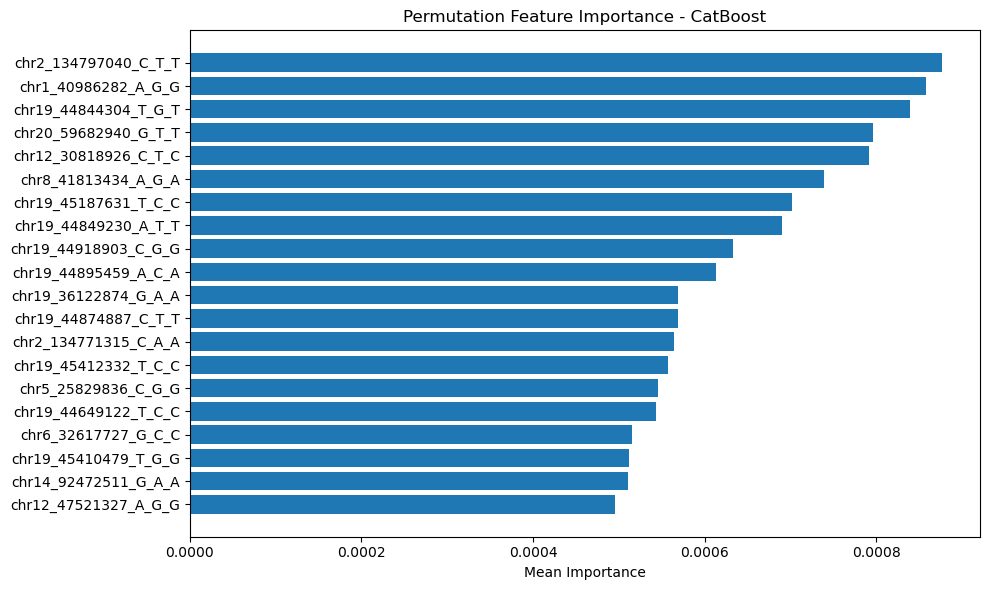


🔎 Evaluating NeuralNetwork with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.5842 ± 0.0091
📊 NeuralNetwork - Train AUC: 0.5969 | Test AUC: 0.5760


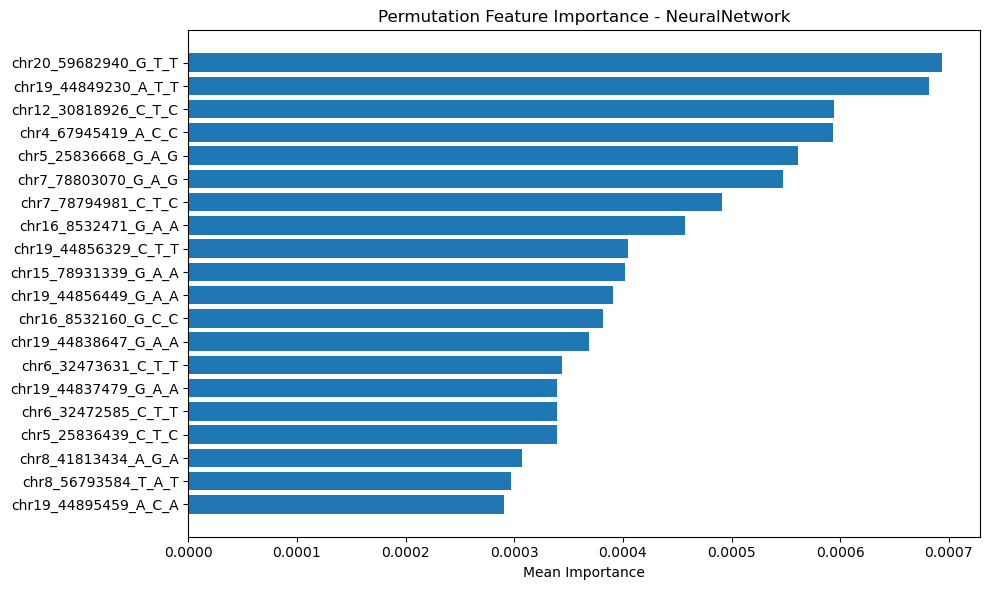

In [28]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store best models from the hyperparameter tuning step
best_models = {}

# === Evaluate models using the optimized parameters === #
for name, config in param_distributions.items():
    print(f"\n🔎 Evaluating {name} with best hyperparameters...")

    # Get the best model from RandomizedSearchCV
    random_search = RandomizedSearchCV(
        config["model"], config["params"], cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1
    )
    random_search.fit(X_train, y_train)  # Tune on training data only
    best_model = random_search.best_estimator_

    # Store the best model
    best_models[name] = best_model

    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"✅ Mean ROC-AUC (CV): {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")

    # Predict probabilities using the best model
    y_train_pred = best_model.predict_proba(X_train)[:, 1]
    y_test_pred = best_model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    print(f"📊 {name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

    # === Permutation Feature Importance (PFI) === #
    result = permutation_importance(best_model, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)

    # Save feature importance results
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    importance_df.to_csv(f"../output/tables/PFI_{name}_ADSP.csv", index=False)

    # === Plot top 20 important features === #
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"../output/plots/PFI_{name}_CHsumStat_PRADIdosage_recessive_ADSP.png")
    plt.show()
